## Outline

Last updated: 02/26/2023


1. [Import modules](#bullet1)
2. [Import NYCOD data, dtype handling](#bullet2)
3. [Import PLUTO data, dtype handling](#bullet3)
4. [Join NYCOD and PLUTO](#bullet4)
5. [Save out csv](#bullet5)

#### Import modules <a class="anchor" id="bullet1"></a>

In [1]:
#import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

#### Import NYCOD data <a class="anchor" id="bullet2"></a>

In [6]:
#read in sales data
sales17 = pd.read_csv("2017_manhattan.csv", skiprows=5, header=None).dropna(how='all')
sales18 = pd.read_csv("2018_manhattan.csv", skiprows=5, header=None).dropna(how='all')
sales19 = pd.read_csv("2019_manhattan.csv", skiprows=5, header=None).dropna(how='all')
sales20 = pd.read_csv("2020_manhattan.csv", skiprows=7, header=None).dropna(how='all')
sales21 = pd.read_csv("2021_manhattan.csv", skiprows=7, header=None).dropna(how='all')
sales22 = pd.read_csv("rollingsales_manhattan.csv", skiprows=1, header=None).dropna(how='all')
labels = pd.DataFrame(pd.read_csv("2021_manhattan.csv", header=6).columns).T

#concatenate all dfs, check shapes
allsales = pd.concat((sales17, sales18, sales19, sales20, sales21, sales22), axis=0)
print(sales17.shape, sales18.shape, sales19.shape, sales20.shape, sales21.shape, sales22.shape)
allsales = allsales.iloc[:,0:21]
print(allsales.shape)

#add labels
allsales = pd.concat((labels, allsales), axis=0)
allsales.columns=allsales.iloc[0] 
allsales = allsales[1:]
allsales.head()

(18642, 21) (17041, 21) (17583, 21) (12880, 21) (22756, 21) (21324, 24)
(110226, 21)


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL\nUNITS,COMMERCIAL\nUNITS,TOTAL \nUNITS,LAND \nSQUARE FEET,GROSS \nSQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS\nAT TIME OF SALE,SALE PRICE,SALE DATE
0,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,375.0,28.0,,C4,738 EAST 6TH STREET,,...,11,0.0,11,"1,750","6,500",1900.0,2.0,C4,"3,750,000",4/3/2017
1,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,385.0,36.0,,C7,27 AVENUE C,,...,24,1.0,25,"2,650","9,960",1910.0,2.0,C7,"5,235,000",7/11/2017
2,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392.0,5.0,,C2,151 AVENUE B,,...,5,0.0,5,"2,139","4,416",1900.0,2.0,C2,0,6/16/2017
3,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392.0,6.0,,C2,153 AVENUE B,,...,5,0.0,5,"1,633","6,440",1900.0,2.0,C2,"6,625,000",7/19/2017
4,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,400.0,61.0,,C7,193 EAST 4TH STREET,,...,11,1.0,12,"2,388","8,045",1900.0,2.0,C7,"7,675,000",11/13/2017


##### NYCOD Dtype handling

In [7]:
allsales.dtypes

0
BOROUGH                            object
NEIGHBORHOOD                       object
BUILDING CLASS CATEGORY            object
TAX CLASS AT PRESENT               object
BLOCK                              object
LOT                                object
EASE-MENT                          object
BUILDING CLASS AT PRESENT          object
ADDRESS                            object
APARTMENT NUMBER                   object
ZIP CODE                           object
RESIDENTIAL\nUNITS                 object
COMMERCIAL\nUNITS                  object
TOTAL \nUNITS                      object
LAND \nSQUARE FEET                 object
GROSS \nSQUARE FEET                object
YEAR BUILT                         object
TAX CLASS AT TIME OF SALE          object
BUILDING CLASS\nAT TIME OF SALE    object
SALE PRICE                         object
SALE DATE                          object
dtype: object

In [8]:
#convert objects to numeric where possible
allsales['BOROUGH'] = allsales['BOROUGH'].astype(int)
allsales['BLOCK'] = allsales['BLOCK'].astype(int)
allsales['LOT'] = allsales['LOT'].astype(int)
allsales['ZIP CODE'] = allsales['ZIP CODE'].astype(int)
allsales['RESIDENTIAL\nUNITS'] = pd.to_numeric(allsales['RESIDENTIAL\nUNITS'].str.replace(',',''), errors='coerce')
allsales['TOTAL \nUNITS'] = pd.to_numeric(allsales['TOTAL \nUNITS'].str.replace(',',''), errors='coerce')
allsales['LAND \nSQUARE FEET'] = pd.to_numeric(allsales['LAND \nSQUARE FEET'].str.replace(',',''), errors='coerce')
allsales['GROSS \nSQUARE FEET'] = pd.to_numeric(allsales['GROSS \nSQUARE FEET'].str.replace(',',''), errors='coerce')
allsales['COMMERCIAL\nUNITS'] = pd.to_numeric(allsales['COMMERCIAL\nUNITS'], errors='coerce')
allsales['YEAR BUILT'] = pd.to_numeric(allsales['YEAR BUILT'], errors='coerce')

#add price variable
prices = []
for i in allsales['SALE PRICE']:
    a = float(i.replace(",", "").replace("'", "").replace("$", ""))
    a = float(a)
    prices.append(a)
allsales['saleprice'] = prices

#add sale date in datetime format
import datetime
dates = []
for i in allsales['SALE DATE']:
    b = datetime.datetime.strptime(i, "%m/%d/%Y")
    dates.append(b)
allsales['saledate'] = dates

In [9]:
allsales.dtypes

0
BOROUGH                                     int32
NEIGHBORHOOD                               object
BUILDING CLASS CATEGORY                    object
TAX CLASS AT PRESENT                       object
BLOCK                                       int32
LOT                                         int32
EASE-MENT                                  object
BUILDING CLASS AT PRESENT                  object
ADDRESS                                    object
APARTMENT NUMBER                           object
ZIP CODE                                    int32
RESIDENTIAL\nUNITS                        float64
COMMERCIAL\nUNITS                         float64
TOTAL \nUNITS                             float64
LAND \nSQUARE FEET                        float64
GROSS \nSQUARE FEET                       float64
YEAR BUILT                                float64
TAX CLASS AT TIME OF SALE                  object
BUILDING CLASS\nAT TIME OF SALE            object
SALE PRICE                                 objec

In [11]:
#drop irrelevant and duplicate columns
allsales = allsales.drop(columns=['BOROUGH', 
                                  'BUILDING CLASS CATEGORY', 
                                  'TAX CLASS AT PRESENT', 
                                  'BUILDING CLASS AT PRESENT',
                                  'SALE PRICE',
                                  'SALE DATE',
                                  'EASE-MENT'])

#rename columns for interpretability
col_mapper = {'RESIDENTIAL\nUNITS':'units_res',
             'COMMERCIAL\nUNITS':'units_comm',
             'TOTAL \nUNITS':'units_tot',
             'LAND \nSQUARE FEET': 'sqft_land',
             'GROSS \nSQUARE FEET': 'sqft_gross',
             'TAX CLASS AT TIME OF SALE':'class_at_sale_tax',
             'BUILDING CLASS\nAT TIME OF SALE':'class_at_sale_bldg'}

allsales = allsales.rename(mapper=col_mapper, axis=1)

allsales.dtypes

0
NEIGHBORHOOD                  object
BLOCK                          int32
LOT                            int32
ADDRESS                       object
APARTMENT NUMBER              object
ZIP CODE                       int32
units_res                    float64
units_comm                   float64
units_tot                    float64
sqft_land                    float64
sqft_gross                   float64
YEAR BUILT                   float64
class_at_sale_tax             object
class_at_sale_bldg            object
saleprice                    float64
saledate              datetime64[ns]
dtype: object

In [18]:
allsales.describe()

,BLOCK,LOT,ZIP CODE,units_res,units_comm,units_tot,sqft_land,sqft_gross,YEAR BUILT,saleprice
count,110226.000000,110226.000000,110226.000000,36942.000000,57999.000000,37680.000000,3.953500e+04,3.944100e+04,102161.000000,1.102260e+05
mean,1106.561564,751.726752,10013.169261,3.578366,0.597890,3.922346,2.971568e+03,1.016950e+04,1863.641135,3.138684e+06
std,528.100785,908.125569,412.272537,51.950724,7.114079,52.039896,1.876993e+04,8.005757e+04,411.854134,2.245199e+07
min,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,751.000000,29.000000,10013.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,1920.000000,3.550000e+05
50%,1167.000000,1003.000000,10022.000000,1.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,1952.000000,8.750000e+05
75%,1451.000000,1203.000000,10028.000000,1.000000,0.000000,1.000000,1.867000e+03,2.542000e+03,1985.000000,2.000000e+06
max,2250.000000,9116.000000,10463.000000,8764.000000,570.000000,8812.000000,2.675000e+06,8.942176e+06,2022.000000,2.397502e+09


In [68]:
#problematic data
missing = pd.DataFrame(allsales.isna().sum()).rename(columns={0: 'missing_count'})
zeros = pd.DataFrame((allsales == 0).astype(int).sum(axis=0)).rename(columns={0: 'zero_count'})
problems = pd.concat((missing, zeros), axis=1)
problems['missing_pct'] = problems.missing_count / len(allsales) * 100
problems['zero_pct'] = problems.zero_count / len(allsales) * 100
dtypes = list(allsales.dtypes)
problems['type'] = dtypes

problems.sort_values('missing_pct', ascending=False)

,missing_count,zero_count,missing_pct,zero_pct,type
0,,,,,
units_res,73284,10849,66.485221,9.842505,float64
units_tot,72546,8833,65.815688,8.013536,float64
sqft_gross,70785,22471,64.218061,20.386297,float64
sqft_land,70691,26897,64.132782,24.401684,float64
units_comm,52227,49858,47.381743,45.232522,float64
APARTMENT NUMBER,49025,0,44.476802,0.000000,object
YEAR BUILT,8065,4720,7.316786,4.282111,float64
NEIGHBORHOOD,0,0,0.000000,0.000000,object
BLOCK,0,0,0.000000,0.000000,int32


C:\Users\lproc\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\lproc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='saledate', ylabel='saleprice'>

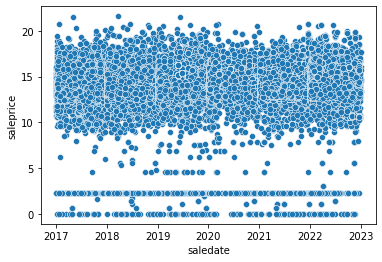

In [64]:
import seaborn as sns
sns.scatterplot('saledate', np.log(allsales.saleprice), data=allsales)

#### Import PLUTO data <a class="anchor" id="bullet3"></a>

In [16]:
pluto = pd.read_csv("pluto_22v3_1.csv", low_memory=False)
pluto = pluto.dropna(how='all')

#subset to include Manhattan only
man = pluto[pluto['borough']=='MN']
man.head()

,borough,block,lot,cd,bct2020,bctcb2020,ct2010,cb2010,schooldist,council,...,appbbl,appdate,plutomapid,firm07_flag,pfirm15_flag,version,dcpedited,latitude,longitude,notes
10,MN,1917,7502,110.0,1022600.0,1.022600e+10,226.0,1002.0,5.0,9.0,...,1.019170e+09,04/07/2009,1,NaN,NaN,22v3.1,t,40.812789,-73.943106,NaN
51,MN,1888,7504,107.0,1018700.0,1.018700e+10,187.0,2000.0,3.0,6.0,...,1.018880e+09,07/22/2016,1,NaN,NaN,22v3.1,NaN,40.797997,-73.973132,NaN
63,MN,434,7502,103.0,1003200.0,1.003200e+10,32.0,2000.0,1.0,2.0,...,1.004340e+09,12/24/1991,1,NaN,NaN,22v3.1,NaN,40.726073,-73.984147,NaN
72,MN,1253,7502,107.0,1018300.0,1.018300e+10,183.0,3000.0,3.0,6.0,...,1.012530e+09,10/24/1989,1,NaN,NaN,22v3.1,NaN,40.794874,-73.975838,NaN
111,MN,637,7502,102.0,1007500.0,1.007500e+10,75.0,2002.0,2.0,3.0,...,1.006371e+09,08/25/1988,1,NaN,1.0,22v3.1,NaN,40.735162,-74.009284,NaN


##### PLUTO Dtype handling

In [17]:
my_list = pd.DataFrame(man.dtypes)
a = my_list[my_list[0] == 'object']

for i in a.index:
    print("Categorical variable: {}".format(i))
    print("Unique values ({}): {}".format(len(pd.unique(man[i])), pd.unique(man[i])))
    print("\n")

Categorical variable: borough
Unique values (1): ['MN']


Categorical variable: firecomp
Unique values (77): ['E059' 'L022' 'L011' 'L005' 'E069' 'L035' 'L025' 'E037' 'L014' 'E058'
 'E074' 'E009' 'E044' 'E015' 'E054' 'L040' 'L021' 'E028' 'E033' 'L015'
 'L026' 'E076' 'E007' 'E040' 'L023' 'E067' 'L007' 'E024' 'L001' 'E091'
 'L010' 'L028' 'E001' 'E035' 'L012' 'E047' 'E026' 'E023' 'L016' 'E039'
 'E022' 'L043' 'L045' 'E093' nan 'L008' 'L030' 'L006' 'L020' 'E055' 'E010'
 'L009' 'L018' 'E008' 'L002' 'L013' 'E053' 'E080' 'E034' 'L004' 'E016'
 'E006' 'E014' 'E084' 'L024' 'E005' 'E021' 'L003' 'E004' 'L034' 'E003'
 'L036' 'E095' 'Q018' 'E065' 'E081' 'E260']


Categorical variable: sanitsub
Unique values (28): ['3B' '4B' '4A' '2K' '1Q' '2A' '2B' '1R' '1B' '3A' '1A' '5A' '5B' '2Q'
 '4Q' nan '1F' '1G' '3R' '1H' '1O' '5R' '3Q' '4R' '2R' '5Q' '1C' '1S']


Categorical variable: address
Unique values (41711): ['121 WEST 132 STREET' '270 RIVERSIDE DRIVE' '128 EAST 7 STREET' ...
 '331 EAST 58 STREET' '266 

#### Merge NYCOD and PLUTO data <a class="anchor" id="bullet4"></a>

In [89]:
df = allsales.merge(man, how='left', left_on=['BLOCK', 'LOT'], right_on=['block', 'lot'])
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,appbbl,appdate,plutomapid,firm07_flag,pfirm15_flag,version,dcpedited,latitude,longitude,notes
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,375,28,,C4,738 EAST 6TH STREET,,...,NaN,NaN,1.0,NaN,NaN,22v3.1,NaN,40.722732,-73.977946,NaN
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,385,36,,C7,27 AVENUE C,,...,NaN,NaN,1.0,NaN,NaN,22v3.1,NaN,40.721552,-73.981031,NaN
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,5,,C2,151 AVENUE B,,...,NaN,NaN,1.0,NaN,1.0,22v3.1,t,40.726498,-73.979864,NaN
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,NaN,NaN,1.0,NaN,1.0,22v3.1,NaN,40.726569,-73.979857,NaN
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,400,61,,C7,193 EAST 4TH STREET,,...,NaN,NaN,1.0,NaN,NaN,22v3.1,NaN,40.724240,-73.984223,NaN


In [103]:
#count length of df
print(allsales.shape)
print(man.shape)
print(df.shape)

#count obs with missing locations
print(len(df[df['longitude'].isna()]))

(110226, 23)
(42695, 92)
(110226, 115)
58088


#### Save out csv <a class="anchor" id="bullet5"></a>

In [102]:
df.to_csv('new.csv')